# Statistics_Question_3

In [21]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#### Read the dataset

In [2]:
data = pd.read_csv('data.csv')


#### Top rows of dataset

In [15]:
data.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


#### Renaming column for removing white spaces

In [12]:
data = data.rename(columns={' Blood Pressure Before (mmHg)': 'Blood Pressure Before (mmHg)', ' Blood Pressure After (mmHg)': 'Blood Pressure After (mmHg)'})

#### Extract the 'Blood Pressure Before' and 'Blood Pressure After' columns

In [18]:
bp_before = data['Blood Pressure Before (mmHg)']
bp_after = data['Blood Pressure After (mmHg)']

#### Access the 'Blood Pressure Before' and 'Blood Pressure After' columns


In [13]:
blood_pressure_before = data['Blood Pressure Before (mmHg)']
blood_pressure_after = data['Blood Pressure After (mmHg)']

### Ans 3. a.) Measure the dispersion in both and interpret the results.

In [19]:
range_before = np.max(bp_before) - np.min(bp_before)
range_after = np.max(bp_after) - np.min(bp_after)
iqr_before = stats.iqr(bp_before)
iqr_after = stats.iqr(bp_after)
variance_before = np.var(bp_before)
variance_after = np.var(bp_after)
std_before = np.std(bp_before)
std_after = np.std(bp_after)

print("Dispersion measures for 'Blood Pressure Before':")
print("Range:", range_before)
print("Interquartile Range (IQR):", iqr_before)
print("Variance:", variance_before)
print("Standard Deviation:", std_before)

print("\nDispersion measures for 'Blood Pressure After':")
print("Range:", range_after)
print("Interquartile Range (IQR):", iqr_after)
print("Variance:", variance_after)
print("Standard Deviation:", std_after)


Dispersion measures for 'Blood Pressure Before':
Range: 28
Interquartile Range (IQR): 11.25
Variance: 43.10189999999998
Standard Deviation: 6.5652037287505385

Dispersion measures for 'Blood Pressure After':
Range: 23
Interquartile Range (IQR): 12.0
Variance: 46.97040000000002
Standard Deviation: 6.853495458523338


### Ans 3.b.) Calculating mean and 5% confidence interval and plotting it in a graph


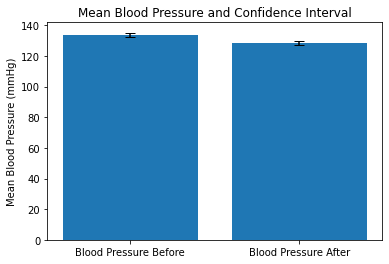

In [22]:
mean_before = np.mean(bp_before)
mean_after = np.mean(bp_after)
std_error_before = stats.sem(bp_before)
std_error_after = stats.sem(bp_after)
confidence_interval_before = stats.t.interval(0.95, len(bp_before)-1, loc=mean_before, scale=std_error_before)
confidence_interval_after = stats.t.interval(0.95, len(bp_after)-1, loc=mean_after, scale=std_error_after)

labels = ['Blood Pressure Before', 'Blood Pressure After']
means = [mean_before, mean_after]
confidence_intervals = [confidence_interval_before, confidence_interval_after]

x = np.arange(len(labels))
plt.bar(x, means, yerr=[(ci[1] - ci[0])/2 for ci in confidence_intervals], capsize=5)
plt.xticks(x, labels)
plt.ylabel('Mean Blood Pressure (mmHg)')
plt.title('Mean Blood Pressure and Confidence Interval')
plt.show()

### Ans 3.c.) Calculate Mean Absolute Deviation (MAD) and Standard Deviation (SD)


In [23]:
mad_before = np.mean(np.abs(bp_before - np.mean(bp_before)))
mad_after = np.mean(np.abs(bp_after - np.mean(bp_after)))

print("\nMean Absolute Deviation (MAD) for 'Blood Pressure Before':", mad_before)
print("Mean Absolute Deviation (MAD) for 'Blood Pressure After':", mad_after)

print("\nStandard Deviation (SD) for 'Blood Pressure Before':", std_before)
print("Standard Deviation (SD) for 'Blood Pressure After':", std_after)


Mean Absolute Deviation (MAD) for 'Blood Pressure Before': 5.7118
Mean Absolute Deviation (MAD) for 'Blood Pressure After': 5.9

Standard Deviation (SD) for 'Blood Pressure Before': 6.5652037287505385
Standard Deviation (SD) for 'Blood Pressure After': 6.853495458523338


### Ans 3.d.) Calculate correlation coefficient and check significance at 1% level

In [24]:
correlation_coefficient, p_value = stats.pearsonr(bp_before, bp_after)

print("\nCorrelation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

alpha = 0.01
if p_value < alpha:
    print("Correlation is significant at the 1% level.")
else:
    print("Correlation is not significant at the 1% level.")


Correlation Coefficient: 0.9779485966556017
P-value: 1.8097381433072956e-68
Correlation is significant at the 1% level.
